# <font color='green'>Project Goal</font>

Working for OilyGiant mining company, with the goal to find the area with the least risk of loss. We need to investigate three areas finding the more convinient one to create a new oil well.

### Download and prepare the data. Explain the procedure.

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [2]:
display(geo_0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [3]:
display(geo_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [4]:
display(geo_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [5]:
#General information about the datasets.

print('From the tables above, I can understand that the three dataset are equals.')
print('Their shape looks like:')
print()
print(geo_0.shape)
print()
print('The 3 datasets have {0}'.format(geo_0.shape[0]), 'rows.')
print()
print('The 3 datasets have {0}'.format(geo_0.shape[1]), 'columns.')
print()
print('The 3 datasets has {0}'.format(geo_0.duplicated().sum()), 'duplicates.')

From the tables above, I can understand that the three dataset are equals.
Their shape looks like:

(100000, 5)

The 3 datasets have 100000 rows.

The 3 datasets have 5 columns.

The 3 datasets has 0 duplicates.


In [6]:
#describe method for dataset.
print('geo_0 describe method:')
print(geo_0.describe())
print()
print('geo_1 describe method:')
print(geo_1.describe())
print()
print('geo_2 describe method:')
print(geo_2.describe())

geo_0 describe method:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

geo_1 describe method:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.

In [7]:
#Investigating columns in geo_0

for column in geo_0:
    columnSeriesObj = geo_0[column]
    print('Colunm Name : ', column)
    print()
    print('Column Contents :')
    print(columnSeriesObj.value_counts(dropna=False))
    print()
    print('The number of unique value is:', columnSeriesObj.nunique())
    print()
    print('--------------------------------------------')
    print()

Colunm Name :  id

Column Contents :
QcMuo    2
A5aEY    2
bxg6G    2
TtcGQ    2
bsk9y    2
        ..
PdqQX    1
sDfB7    1
1Xp6l    1
tEPYG    1
EviLs    1
Name: id, Length: 99990, dtype: int64

The number of unique value is: 99990

--------------------------------------------

Colunm Name :  f0

Column Contents :
-1.017607    1
 1.147603    1
-0.731757    1
-1.193550    1
 0.796797    1
            ..
 0.946916    1
 0.144982    1
 0.033429    1
 1.858456    1
 0.509805    1
Name: f0, Length: 100000, dtype: int64

The number of unique value is: 100000

--------------------------------------------

Colunm Name :  f1

Column Contents :
 0.675282    1
 0.226651    1
 0.824733    1
 0.132691    1
 0.507665    1
            ..
-0.433377    1
 0.546259    1
 0.530130    1
 0.045090    1
 0.685045    1
Name: f1, Length: 100000, dtype: int64

The number of unique value is: 100000

--------------------------------------------

Colunm Name :  f2

Column Contents :
 2.163763    1
-0.828819    

In [8]:
#Investigating columns geo_1

for column in geo_1:
    columnSeriesObj = geo_1[column]
    print('Colunm Name : ', column)
    print()
    print('Column Contents :')
    print(columnSeriesObj.value_counts(dropna=False))
    print()
    print('The number of unique value is:', columnSeriesObj.nunique())
    print()
    print('--------------------------------------------')
    print()

Colunm Name :  id

Column Contents :
LHZR0    2
5ltQ6    2
bfPNe    2
wt4Uk    2
KtDn7    1
        ..
EYfvx    1
XpA1f    1
GlcbI    1
AA21a    1
DDb0T    1
Name: id, Length: 99996, dtype: int64

The number of unique value is: 99996

--------------------------------------------

Colunm Name :  f0

Column Contents :
-4.545515     1
 5.297343     1
-13.075676    1
 0.384176     1
 21.030916    1
             ..
-4.506841     1
-2.148038     1
-8.212404     1
-0.706976     1
-5.245586     1
Name: f0, Length: 100000, dtype: int64

The number of unique value is: 100000

--------------------------------------------

Colunm Name :  f1

Column Contents :
-2.420454     1
-8.292583     1
-8.575602     1
-8.043060     1
-4.761843     1
             ..
-2.429287     1
-10.155352    1
-8.125222     1
-8.109408     1
-2.703362     1
Name: f1, Length: 100000, dtype: int64

The number of unique value is: 100000

--------------------------------------------

Colunm Name :  f2

Column Contents :
 2.002

In [9]:
#Investigating columns geo_2

for column in geo_2:
    columnSeriesObj = geo_2[column]
    print('Colunm Name : ', column)
    print()
    print('Column Contents :')
    print(columnSeriesObj.value_counts(dropna=False))
    print()
    print('The number of unique value is:', columnSeriesObj.nunique())
    print()
    print('--------------------------------------------')
    print()

Colunm Name :  id

Column Contents :
VF7Jo    2
KUPhW    2
xCHr8    2
Vcm5J    2
00c6N    1
        ..
A1Xnj    1
poUmc    1
3kBQS    1
kaQXB    1
S24iU    1
Name: id, Length: 99996, dtype: int64

The number of unique value is: 99996

--------------------------------------------

Colunm Name :  f0

Column Contents :
-1.648445    1
 1.003758    1
-1.864906    1
-3.603933    1
 0.213231    1
            ..
 0.233296    1
 0.736351    1
 1.823606    1
-1.117580    1
 0.728740    1
Name: f0, Length: 100000, dtype: int64

The number of unique value is: 100000

--------------------------------------------

Colunm Name :  f1

Column Contents :
-1.888663    1
 1.254449    1
-2.240571    1
 1.341936    1
 0.103396    1
            ..
-0.702685    1
-1.820815    1
-1.302992    1
 0.242257    1
 2.623684    1
Name: f1, Length: 100000, dtype: int64

The number of unique value is: 100000

--------------------------------------------

Colunm Name :  f2

Column Contents :
 5.256481     1
-1.473363   

In [10]:
# Check to understand if 'product' column contain negative values, empty df expected.
print(geo_0.query('product < 0'))
print(geo_1.query('product < 0'))
print(geo_2.query('product < 0')) #positive check, let's move on.

Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []
Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []
Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []


In [11]:
print("Don't need to prepare data. I can move further on model training.")
print("Doesn't even make any sense to analyze target balance. Considered that we need to perfom a linear regression.")

Don't need to prepare data. I can move further on model training.
Doesn't even make any sense to analyze target balance. Considered that we need to perfom a linear regression.


# Brief summarize - Point 1

Started with importing the three dataset about regions. 
The 3 dataframes present 100 thounsand rows for each divided by 5 columns
Those three dataset have a not clear understandable structure and we don't need to understand what columns stand for.
The important thing while working on those data is to understand that we have 3 column as features, one for the id of the wells and another wich is our target represent the volume of product for each well. Keeping in mind that each unit can generate 4500$, we can continue our study.

The data are already prepared we don't need to pre-process them as they do not present duplicates and neither NaN in the rows.

Dealing with a continous variable as target is clear that we need a regression kind model to deal with them.

### Train and test the model for each region.

#### Split the data into a training set and validation set at a ratio of 75:25.

In [12]:
#geo_0
features_0 = geo_0.drop(['product','id'], axis=1)
target_0 = geo_0['product']

In [13]:
#geo_0
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size=0.25, random_state=0)

In [14]:
#Creating a target variable for geo_1
y_true = geo_1['product'].values

#Printing how the variable itself + len of the variable.
print('y_true:',y_true)
print()
print('y_true lenght:',len(y_true)) #Should return the len of the starting dataframe.

#I do this step only in this dataframe, cause cannot stratify dataframes where unique values == len(data).

y_true: [  3.17910258  26.95326103 134.76630516 ... 137.94540774  30.13236361
   3.17910258]

y_true lenght: 100000


In [15]:
#geo_1
train_1, valid_1 = train_test_split(geo_1, stratify=y_true, test_size=0.25, random_state=1)

In [16]:
#geo_1
features_train_1 = train_1.drop(['product','id'], axis=1)
target_train_1 = train_1['product']
features_valid_1 = valid_1.drop(['product','id'], axis=1)
target_valid_1 = valid_1['product']

In [17]:
#geo_2
features_2 = geo_2.drop(['product','id'], axis=1)
target_2 = geo_2['product']

In [18]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=2)

In [19]:
#Assigning the scaler
scaler = StandardScaler()

In [20]:
#Scaling geo_0 df.
features_train_0 = scaler.fit_transform(features_train_0)
features_valid_0 = scaler.transform(features_valid_0) 

In [21]:
#Scaling geo_1 df.
features_train_1 = scaler.fit_transform(features_train_1)
features_valid_1 = scaler.transform(features_valid_1) 

In [22]:
#Scaling geo_2 df.
features_train_2 = scaler.fit_transform(features_train_2)
features_valid_2 = scaler.transform(features_valid_2) 

#### Train the model and make predictions for the validation set.

In [23]:
#geo_0 LinearRegression model.
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0) # < train the model >
predictions_valid_0 = model_0.predict(features_valid_0) 

mse = mean_squared_error(target_valid_0, predictions_valid_0)
rmse = mean_squared_error(target_valid_0, predictions_valid_0)**0.5
r2 = r2_score(target_valid_0, predictions_valid_0)
print('Coefficient:', model_0.coef_)
print('Intercept:', model_0.intercept_)
print('Linear regression mse (Mean Squared Error):', mse)
print('Linear regression rmse (Root-Mean-Square Deviation):', rmse) 
print('Linear regression r2 score (Coefficient of Determination):', r2)
print()
print('Average volume of predictions for geo_0 model is:', predictions_valid_0.mean())

Coefficient: [ 3.22874499 -7.0579407  21.42186634]
Intercept: 92.5110716913723
Linear regression mse (Mean Squared Error): 1404.8260333721848
Linear regression rmse (Root-Mean-Square Deviation): 37.48100896950594
Linear regression r2 score (Coefficient of Determination): 0.2809263356941697

Average volume of predictions for geo_0 model is: 92.27144852242301


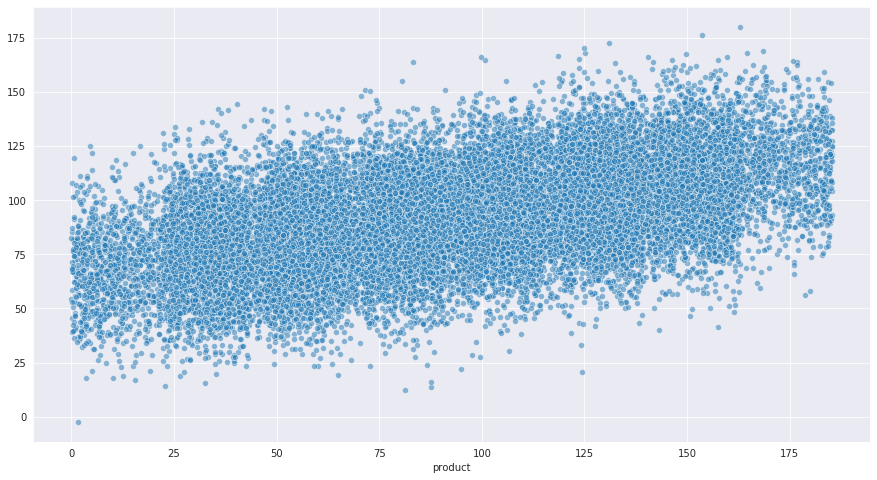

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.scatterplot(target_valid_0, predictions_valid_0, alpha=0.5)
plt.show()

In [25]:
#geo_1 LinearRegression model.
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1) # < train the model >
predictions_valid_1 = model_1.predict(features_valid_1) 

mse = mean_squared_error(target_valid_1, predictions_valid_1)
rmse = mean_squared_error(target_valid_1, predictions_valid_1)**0.5
r2 = r2_score(target_valid_1, predictions_valid_1)
print('Coefficient:', model_1.coef_)
print('Intercept:', model_1.intercept_)
print('Linear regression mse (Mean Squared Error):', mse)
print('Linear regression rmse (Root-Mean-Square Deviation):', rmse) 
print('Linear regression r2 score (Coefficient of Determination):', r2)
print()
print('Average volume of predictions for geo_1 model is:', predictions_valid_1.mean())

Coefficient: [-1.29828567 -0.10742627 45.91431691]
Intercept: 68.82535937681375
Linear regression mse (Mean Squared Error): 0.7802807044151602
Linear regression rmse (Root-Mean-Square Deviation): 0.8833349899189775
Linear regression r2 score (Coefficient of Determination): 0.9996303489375625

Average volume of predictions for geo_1 model is: 68.81935182999118


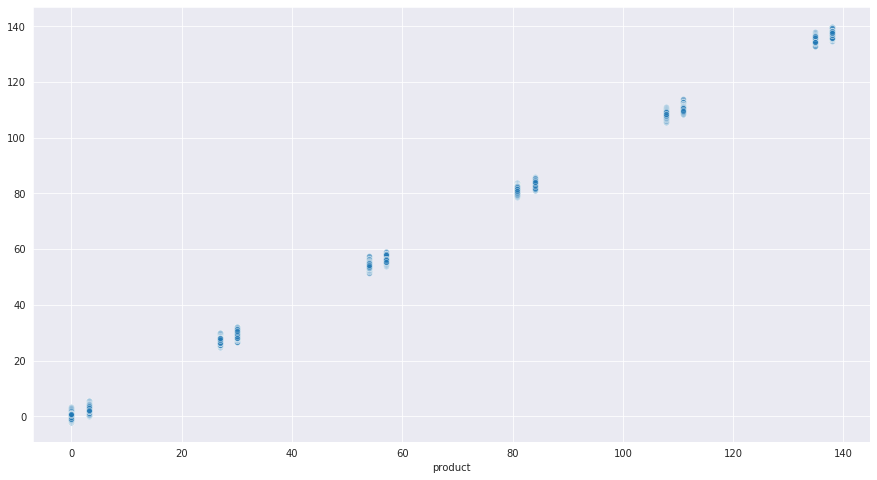

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.scatterplot(target_valid_1, predictions_valid_1, alpha=0.5)
plt.show()

In [27]:
print('Unique values in geo_1 target:',geo_1['product'].nunique())
print()
print('geo_1 target normalized count of values:')
print(geo_1['product'].value_counts(normalize=True)) #proof for the graph.

Unique values in geo_1 target: 12

geo_1 target normalized count of values:
53.906522     0.08472
26.953261     0.08468
84.038886     0.08431
57.085625     0.08390
3.179103      0.08337
80.859783     0.08320
30.132364     0.08306
134.766305    0.08304
110.992147    0.08303
0.000000      0.08235
137.945408    0.08233
107.813044    0.08201
Name: product, dtype: float64


In [28]:
#geo_2 LinearRegression model.
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2) # < train the model >
predictions_valid_2 = model_2.predict(features_valid_2) 

mse = mean_squared_error(target_valid_2, predictions_valid_2)
rmse = mean_squared_error(target_valid_2, predictions_valid_2)**0.5
r2 = r2_score(target_valid_2, predictions_valid_2)
print('Coefficient:', model_2.coef_)
print('Intercept:', model_2.intercept_)
print('Linear regression mse (Mean Squared Error):', mse)
print('Linear regression rmse (Root-Mean-Square Deviation):', rmse) 
print('Linear regression r2 score (Coefficient of Determination):', r2)
print()
print('Average volume of predictions for geo_2 model is:', predictions_valid_2.mean())

Coefficient: [-0.05678432 -0.092124   20.02287581]
Intercept: 95.13384862885665
Linear regression mse (Mean Squared Error): 1598.7921112319639
Linear regression rmse (Root-Mean-Square Deviation): 39.98489853972327
Linear regression r2 score (Coefficient of Determination): 0.19586157572827823

Average volume of predictions for geo_2 model is: 94.85962458982817


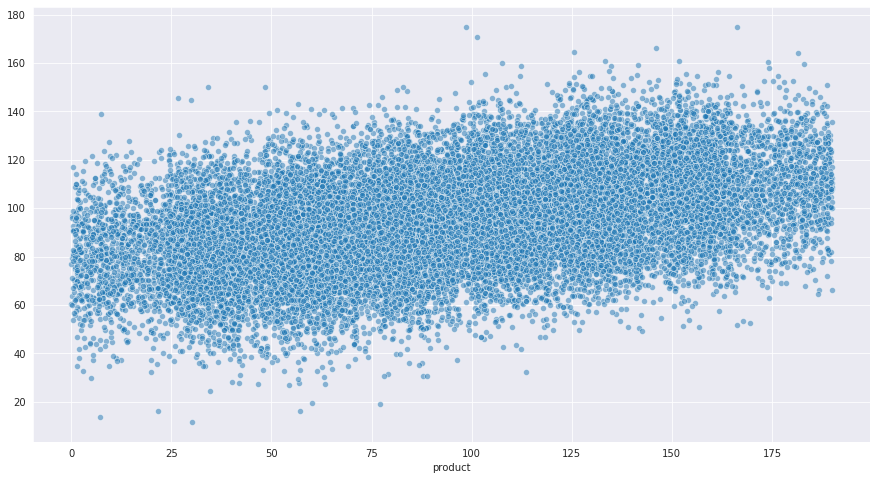

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.scatterplot(target_valid_2, predictions_valid_2, alpha=0.5)
plt.show()

#### Save the predictions and correct answers for the validation set.

In [30]:
print('Saving cross validation target values in variables to be able, to compare that to the model results obtained.')
print()
checking_values_0 = target_valid_0 #This is going to become the array to check the accuracy of our model.
checking_values_1 = target_valid_1 #This is going to become the array to check the accuracy of our model.
checking_values_2 = target_valid_2 #This is going to become the array to check the accuracy of our model.

print('checking_values_0 is an array with', len(checking_values_0),'values.')
print('checking_values_1 is an array with', len(checking_values_1),'values.')
print('checking_values_2 is an array with', len(checking_values_2),'values.')

Saving cross validation target values in variables to be able, to compare that to the model results obtained.

checking_values_0 is an array with 25000 values.
checking_values_1 is an array with 25000 values.
checking_values_2 is an array with 25000 values.


# Brief summarize - Point 2

In the beginning of this step I splitted the three dataframe with a rateo of 75:25, defining wich are the features and the target. I obviously excluded index by both categories since this column is only helpful to indentify the well. 
Only for the "Geographic Area 1" I decided to stratify the split on the target variable. I've done this step only with this dataframe since doesn't make any sense to do the same on the other two geographic area considering that they are too uniformly distribuited. 

Scaled the three dataframe with StandardScaler library.

As told before the choosen model for the project is a LinearRegression one.

Started to build the models and to calculate the various metrics for each of them:
- Obtained for "Geographic Area 0" an rmse of 37.48, r2_score of 0.28 and an average volume of my predictions of 92.51.
Plotting this geographic area we can easely see the linear correlation and the distribution of points in the scatterplot.
- Obtained for "Geographic Area 1" an rmse of 0.88, r2_score of 0.99 and the average volume of my predictions is 68.82.
Plotting this geographic area we see a stronger positive correlation and the point are almost equal distribuited in the same places, we can indentify 12 groups of points in the scatterplot, this respect the unique values found in the target (12).
- Obtained for "Geographic Area 2" an rmse of 39.98, r2_score of 0.19 and the average volume of my predictions is 95.13.
Plotting this geographic area, as the first one we can indentify a linear correlation and a big dispersion of the points.

I saved the target column of each dataframe in arrays kind variables. To be able to check my predictions later on. 

### Prepare for profit calculation.

#### Store all key values for calculations in separate variables.

In [31]:
#Storing useful variables.
BUDGET=100000000 #In USD.
BARREL_REVENUE = 4.5 #Dollars.
RESERVES = 1000
UNIT_PRODUCT_REVENUE = 4500 #Dollars
MILLION = 1000000
COUNT = 200

#### Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

In [32]:
#Barrels needed to reach our budget.
BARREL_NEEDED = BUDGET / BARREL_REVENUE 
print('To reach 100 Million dollars necessaries for 200 oil wells are needed: {:.2f}'.format(BARREL_NEEDED/MILLION), 'Million barrels.')

To reach 100 Million dollars necessaries for 200 oil wells are needed: 22.22 Million barrels.


In [33]:
#Product units needed to reach our budget in the region.
UNITS_REGION = BUDGET / UNIT_PRODUCT_REVENUE
print('To reach our Budget we need {:.2f}'.format(UNITS_REGION),'product units in the entire region.')

To reach our Budget we need 22222.22 product units in the entire region.


In [34]:
#Product units needed to reach our budget in a single well.
UNITS_WELL = UNITS_REGION / 200
print('To reach our Budget we need {:.2f}'.format(UNITS_WELL),'product units in a single well.')

To reach our Budget we need 111.11 product units in a single well.


In [35]:
#Comparing the result with the averages.

result_0 = predictions_valid_0.mean() - UNITS_WELL
result_1 = predictions_valid_1.mean() - UNITS_WELL
result_2 = predictions_valid_2.mean() - UNITS_WELL

In [36]:
print('The comparation between average volume in wells and units needed per wells in geo_0 is: {:.2f}'.format(result_0))
print('The comparation between average volume in wells and units needed per wells in geo_1 is: {:.2f}'.format(result_1))
print('The comparation between average volume in wells and units needed per wells in geo_2 is: {:.2f}'.format(result_2))

The comparation between average volume in wells and units needed per wells in geo_0 is: -18.84
The comparation between average volume in wells and units needed per wells in geo_1 is: -42.29
The comparation between average volume in wells and units needed per wells in geo_2 is: -16.25


# Brief summarize - Point 3

Stored all the values necessaries to condupt the analysis and calculate the revenue.

The constant derivated are:
- budget = 100 USD Million,
- the price of a single petrol barrel  = 4.5 dollars
- the reserves = 1000 (each unit containt 1000 barrels)
- the revenue for each unit of product 4500
- constant with a value of 1 Million only to avoid to repeat numbers and let the code be more readable

I calculated the number of barrels needed to reach 100 Million (our budget), resulted in 22.22 Million petrol barrels.
This make a total of 22222.22 product units needed and 111.11 for each wells.

I compared the units of product necessaries for each well with the average volume: 
geo_0 = -18.84
geo_1 = -42.29
geo_2 = -16.25

### Write a function to calculate profit from a set of selected oil wells and model predictions.

In [37]:
#Defining a function to get the best 200 wells in each region.
def profit(geo, predictions):
    predictions_sorted = pd.Series(predictions, geo.index).sort_values(ascending=False)
    top_target = geo.loc[predictions_sorted.index][:COUNT]
    profit = (((top_target.sum() * UNIT_PRODUCT_REVENUE) - BUDGET) / MILLION)
    return profit

#Obtaining the predictions for the best 200 wells for each region, saving the obtained values in different variables.
profit_geo_0 = profit(target_valid_0, predictions_valid_0)
profit_geo_1 = profit(target_valid_1, predictions_valid_1)
profit_geo_2 = profit(target_valid_2, predictions_valid_2)


In [38]:
profit_df = (pd.DataFrame([profit_geo_0, profit_geo_1, profit_geo_2], columns=['Profit']))
profit_df = profit_df.reset_index()
profit_df.columns=['Geographic Area (geo)', 'Profit (USD Millions)']
profit_df = profit_df.set_index('Geographic Area (geo)')
display(profit_df)

,Profit (USD Millions)
Geographic Area (geo),
0,33.634081
1,24.150867
2,24.269868


# Brief summarize - Point 4

Defined a function to calculate profit, this function takes before the best 200 wells out and return the profit in Millions.
This function need to be passed to the bootstrapping tecnique to obtain for each 500 sample the best 200 out. And returning the upper and lower quantile.

I plotted a graph showing the profit resulting by the best 200 well for the 3 geographic areas.

### Bootstrapping and statistic calculation

In [41]:
#Defining function to execute bootstrapping to find confidence intervals.
def bootstrap(target, predictions):
    state = np.random.RandomState(12345)
    # Store the 95% quantile values to the values variable. 
    #Since we are interested into 95% quantile, looking for values among 2.5% and 97.5%.
    profit_list = []
    target_valid = target.reset_index(drop=True)
    for i in range(1000):
        target_subsample = target_valid.sample(n=500, replace=True, random_state=state)
        predictions_subsample = predictions[target_subsample.index]
        profit_list.append(profit(target_subsample, predictions_subsample)) 
    profit_list = pd.Series(profit_list)
    lower = profit_list.quantile(0.025)
    upper = profit_list.quantile(0.975)
    risk = len(profit_list[profit_list < 0]) / len(profit_list) * 100
    print('The distribution of product volume is included in a range among {:.2f}'.format(lower),'and {:.2f}'.format(upper), 'units.')
    print('The risk percentage is:', risk,'%')

In [42]:
#Calculating the geo_0 product volume range and possible risks.
print('Confidence interval for geo_0.')
bootstrap(target_valid_0, predictions_valid_0)

Confidence interval for geo_0.
The distribution of product volume is included in a range among -0.61 and 9.81 units.
The risk percentage is: 4.7 %


In [43]:
#Calculating the geo_0 product volume range and possible risks.
print('Confidence interval for geo_1.')
bootstrap(target_valid_1, predictions_valid_1)

Confidence interval for geo_1.
The distribution of product volume is included in a range among 0.71 and 9.51 units.
The risk percentage is: 1.4000000000000001 %


In [44]:
#Calculating the geo_0 product volume range and possible risks.
print('Confidence interval for geo_2.')
bootstrap(target_valid_2, predictions_valid_2)

Confidence interval for geo_2.
The distribution of product volume is included in a range among -2.27 and 8.53 units.
The risk percentage is: 12.0 %


# Keep only the regions with the risk of losses lower than 2.5%. 
The more convinient area to invest is geo_1 cause has a negative risk. That mean that in this area we are almost sure to don't have at all losses. The confidence interval of the region bring us to think that it is the much more convinient area.

# Brief summarize - Point 5
I created two lists to store lower and upper values for our confidence intervals, this to let us be able to define the region risk. Defined a function to perform bootstrappings in the various regions. This bootstrap function calculate the confidence interval for the 95% of quantile values. Keeping outside 2.5% from the bottom and 2.5% from the upper sides of our distribution.
The sample used in our bootstrap tecnique are composed by 500 wells and repeat the process for 1000 times. 

To calculate the risks, I am gonna take the proportion of negative profit values over the total profit values and obtaining their percentages.

Confidence Intervals : 
- geo_0 among -0.61 and 9.81.
- geo_1 among +0.71 and 9.51. 
- geo_2 among -2.27 and 8.53.

Risks:
- geo_0 equal to + 4.70%
- geo_1 equal to + 1.40%
- geo_2 equal to +12,
After those calculations resulted that geo_1 is the more convinient area to build a new oil well since we don't have at all risks of losses and our confidence interval is among positive numbers.